Demonstrates that ESA CCI Sea Surface Temperature (SST) L4 data is wrongly interpreted by xarray in two ways:
1. The time is ``1947-05-12T09:58:14`` instead of ``2010-01-01T12:00:00``
2. The SST values are roughly ``-50`` to ``600`` Kelvin instead of ``270`` to ``310`` Kelvin.

Test data: ftp://anon-ftp.ceda.ac.uk/neodc/esacci/sst/data/lt/Analysis/L4/v01.1/2010/01/01/20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc

In [48]:
%matplotlib inline
import xarray as xr
import xarray.plot as plot

ds = xr.open_dataset('20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc')

# We just use a subset here. The problems are the same for the full-res ds.analysed_sst
im = ds.analysed_sst.sel(time=slice(None, None), lat=slice(30., 45.), lon=slice(-60., -45.))

# Remove attributes to make it easier to read output
ds.attrs = {}
im.attrs = {}

In [49]:
ds

<xarray.Dataset>
Dimensions:                 (bnds: 2, lat: 3600, lon: 7200, time: 1)
Coordinates:
  * time                    (time) datetime64[ns] 1947-05-12T09:58:14
  * lat                     (lat) float32 -89.975 -89.925 -89.875 -89.825 ...
  * lon                     (lon) float32 -179.975 -179.925 -179.875 ...
  * bnds                    (bnds) int64 0 1
Data variables:
    time_bnds               (time, bnds) datetime64[ns] 2010-01-01 2010-01-02
    lat_bnds                (lat, bnds) float32 -90.0 -89.95 -89.95 -89.9 ...
    lon_bnds                (lon, bnds) float32 -180.0 -179.95 -179.95 ...
    analysed_sst            (time, lat, lon) float64 274.4 274.4 274.4 274.4 ...
    analysis_error          (time, lat, lon) float64 1.28 1.28 1.28 1.28 ...
    sea_ice_fraction        (time, lat, lon) float64 nan nan nan nan nan nan ...
    sea_ice_fraction_error  (time, lat, lon) float64 nan nan nan nan nan nan ...
    mask                    (time, lat, lon) float64 2.0 2.0 2.0 2.0

In [50]:
im

<xarray.DataArray 'analysed_sst' (time: 1, lat: 300, lon: 300)>
array([[[ 434.50999029,  431.94999035,  431.94999035, ...,  542.02998789,
          542.02998789,  536.909988  ],
        [ 421.70999058,  419.14999063,  419.14999063, ...,  544.58998783,
          542.02998789,  536.909988  ],
        [ 408.90999086,  408.90999086,  408.90999086, ...,  542.02998789,
          539.46998794,  536.909988  ],
        ..., 
        [ 472.83998943,  477.95998932,  480.51998926, ...,  462.61998966,
          457.49998978,  447.25999   ],
        [ 457.47998978,  460.03998972,  460.03998972, ...,  477.97998932,
          472.85998943,  465.1799896 ],
        [ 439.55999018,  442.11999012,  442.11999012, ...,  493.33998897,
          485.65998915,  475.41998938]]])
Coordinates:
  * time     (time) datetime64[ns] 1947-05-12T09:58:14
  * lat      (lat) float32 30.025 30.075 30.125 30.175 30.225 30.275 30.325 ...
  * lon      (lon) float32 -59.975 -59.925 -59.875 -59.825 -59.775 -59.725 ...

In [51]:
im.min(), im.max()

(<xarray.DataArray 'analysed_sst' ()>
 array(-54.51999877952039), <xarray.DataArray 'analysed_sst' ()>
 array(598.349986627698))

From the image below, we can see that the raw values seem to under or overflow (signed/unsigned short misinterpretation?)

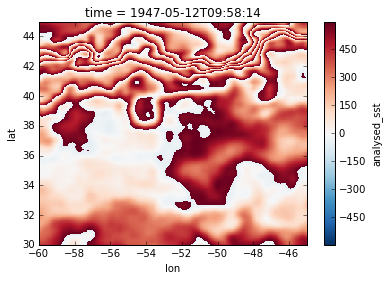

In [52]:
plot.imshow(im.isel(time=0))